<h1>Step Size Analysis

<h4>Imports

In [9]:
# IMPORTS

import numpy as np
import numpy.linalg as npla
import pandas as pd

import math as m
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_theme()

<h4>Data

In [10]:
steps = [600,500,450,425,400]

In [11]:
steps.sort(reverse=True)
Nx = 200; Ny = 200

tot_data = {}

field_base = '/out/lp_field_0.bin'
field_dt_type = np.dtype([('i', np.int64), ('j', np.int64), ('field', np.float64), ('emit',np.int64)])
for step in steps:
    tot_data[step] = np.zeros((Nx,Ny))
    filename = f'h{step}{field_base}'
    data_mem = np.memmap(filename, dtype=field_dt_type, mode='r', order='F')
    data = pd.DataFrame.from_records(data=data_mem, columns=data_mem.dtype.names)

    for k in range(Nx*Ny):
        i = data['i'][k]
        j = data['j'][k]

        tot_data[step][i][j] = data['field'][k]

<h4>Analysis

5.217222394907884


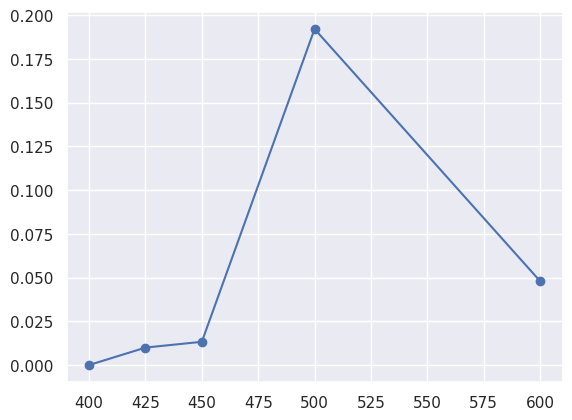

In [12]:
error = []

for step in steps:
    error.append((npla.norm(tot_data[step] - tot_data[steps[-1]]))/(npla.norm(tot_data[steps[-1]])))

# Logarithmic analysis
log_steps = np.array([np.log10(s) for s in steps[:-1]])
log_error = np.array([np.log10(e) for e in error[:-1]])
slope, intercept = np.polyfit(log_steps, log_error, 1)
print(slope)

# Plotting
fig, ax = plt.subplots()
ax.plot(steps, error, marker='o', linestyle='-')